In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("blinkit_data.csv")


In [3]:
# Preview the first few rows
print(df.head())

# Show basic info
print(df.info())

  Item Fat Content Item Identifier              Item Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2010            OUT046               Tier 1   
3                       2000            OUT013               Tier 3   
4                       2015            OUT045               Tier 2   

  Outlet Size        Outlet Type  Item Visibility  Item Weight     Sales  \
0      Medium  Supermarket Type1         0.100014        15.10  145.4786   
1      Medium  Supermarket Type2         0.008596     

KPI Requirments

In [6]:
# Total Sales
total_sales = df['Sales'].sum()
print(f"Total Sales: ₹{total_sales:,.2f}")


Total Sales: ₹1,201,681.48


In [7]:
# Average Sales
average_sales = df['Sales'].mean()
print(f"Average Sales: ₹{average_sales:,.2f}")

Average Sales: ₹140.99


In [8]:
# Number of Items Sold (using count of rows)
number_of_items = df.shape[0]
print(f"Number of Items Sold: {number_of_items}")

Number of Items Sold: 8523


In [9]:
# Average Rating
average_rating = df['Rating'].mean()
print(f"Average Rating: {average_rating:.2f}")

Average Rating: 3.97


BUSINESS REQUIREMENT
Chart’s Requirements


 Chart 1: Donut Chart - Total Sales by Fat Content




In [11]:
# Clean inconsistent values in 'Item Fat Content'
df['Item Fat Content'] = df['Item Fat Content'].str.lower().str.strip()

# Replace similar categories
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'lf': 'low fat',
    'reg': 'regular'
})


In [12]:
# Group again after cleaning
fat_content_group = df.groupby('Item Fat Content').agg(
    Total_Sales=('Sales', 'sum'),
    Average_Sales=('Sales', 'mean'),
    Number_of_Items=('Sales', 'count'),
    Average_Rating=('Rating', 'mean')
).reset_index()


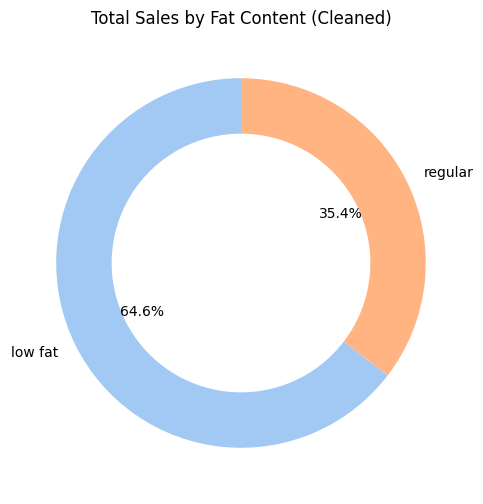

In [13]:
# Plot donut chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')[0:len(fat_content_group)]

plt.pie(fat_content_group['Total_Sales'], labels=fat_content_group['Item Fat Content'],
        autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))
plt.title('Total Sales by Fat Content (Cleaned)')
plt.show()

Bar Chart: Total Sales by Item Type + Other KPIs by Fat Content.

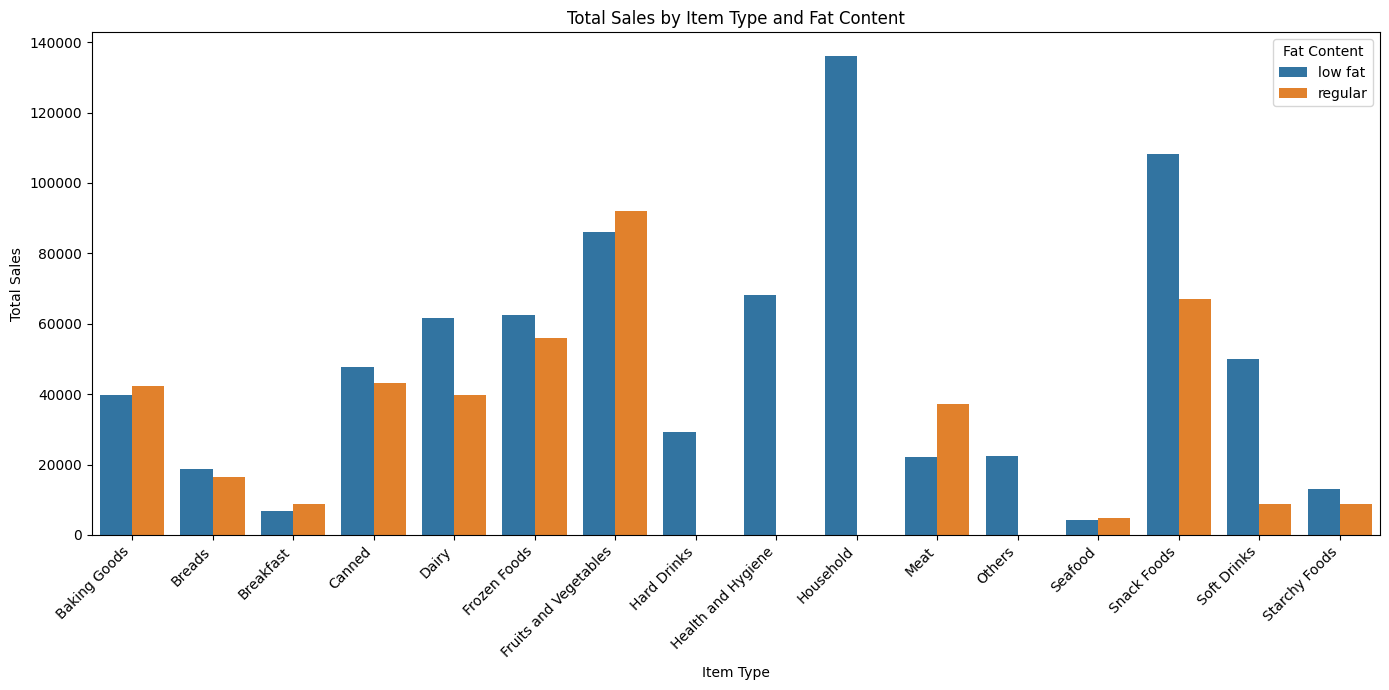

      Item Type Item Fat Content  Total_Sales  Average_Sales  Number_of_Items  \
0  Baking Goods          low fat   39653.0108     120.525869              329   
1  Baking Goods          regular   42241.7256     132.419203              319   
2        Breads          low fat   18841.5058     134.582184              140   
3        Breads          regular   16537.6140     148.987514              111   
4     Breakfast          low fat    6775.6466     165.259673               41   

   Average_Rating  
0        4.002432  
1        3.963009  
2        3.867857  
3        3.898198  
4        4.043902  


In [14]:


# Step 1: Clean Fat Content Column
df['Item Fat Content'] = df['Item Fat Content'].str.lower().str.strip()
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'lf': 'low fat',
    'reg': 'regular'
})

# Step 2: Group by both Item Type and Fat Content
grouped = df.groupby(['Item Type', 'Item Fat Content']).agg(
    Total_Sales=('Sales', 'sum'),
    Average_Sales=('Sales', 'mean'),
    Number_of_Items=('Sales', 'count'),
    Average_Rating=('Rating', 'mean')
).reset_index()

# Step 3: Plotting Total Sales by Item Type & Fat Content as a Bar Chart
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped, x='Item Type', y='Total_Sales', hue='Item Fat Content')
plt.title('Total Sales by Item Type and Fat Content')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.legend(title='Fat Content')
plt.tight_layout()
plt.show()

# Optional: View the table with all KPIs
print(grouped.head())


 Stacked Column Chart for Total Sales by Outlet and Fat Content:



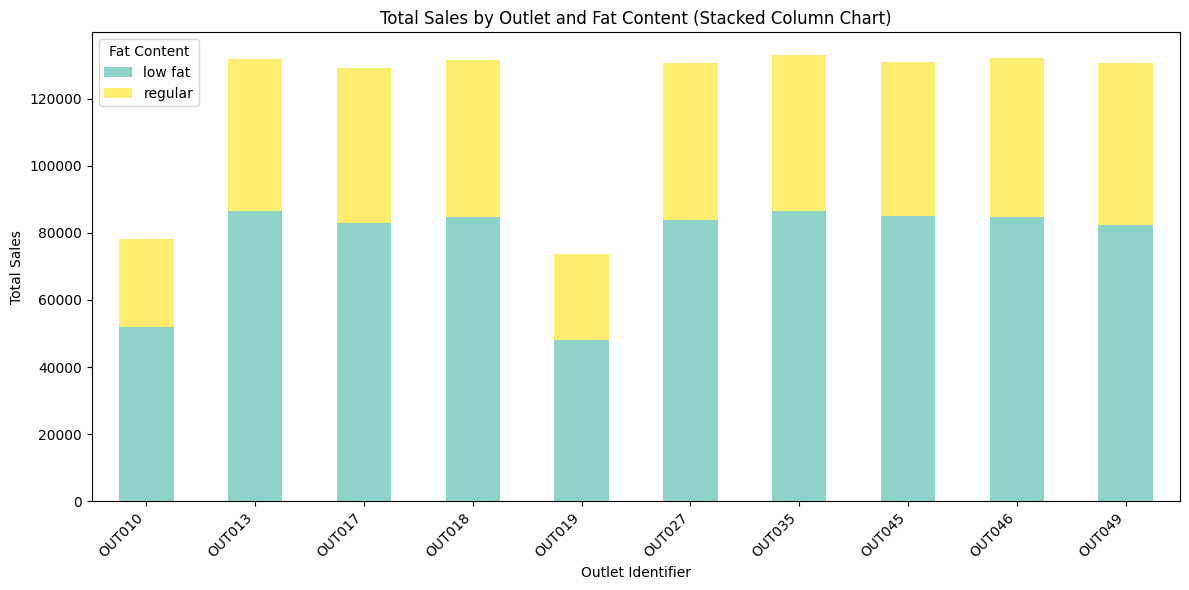

In [15]:

# Assuming df is already loaded and cleaned
df['Item Fat Content'] = df['Item Fat Content'].str.lower().str.strip()
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'lf': 'low fat',
    'reg': 'regular'
})

# Grouping data by both Outlet Identifier and Item Fat Content
stacked_group = df.groupby(['Outlet Identifier', 'Item Fat Content']).agg(
    Total_Sales=('Sales', 'sum')
).reset_index()

# Pivot data for stacked bar chart
pivot_data = stacked_group.pivot(index='Outlet Identifier', columns='Item Fat Content', values='Total_Sales').fillna(0)

# Plotting the Stacked Column Chart
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Total Sales by Outlet and Fat Content (Stacked Column Chart)')
plt.xlabel('Outlet Identifier')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fat Content')
plt.tight_layout()
plt.show()


Line Chart: Total Sales by Outlet Establishment


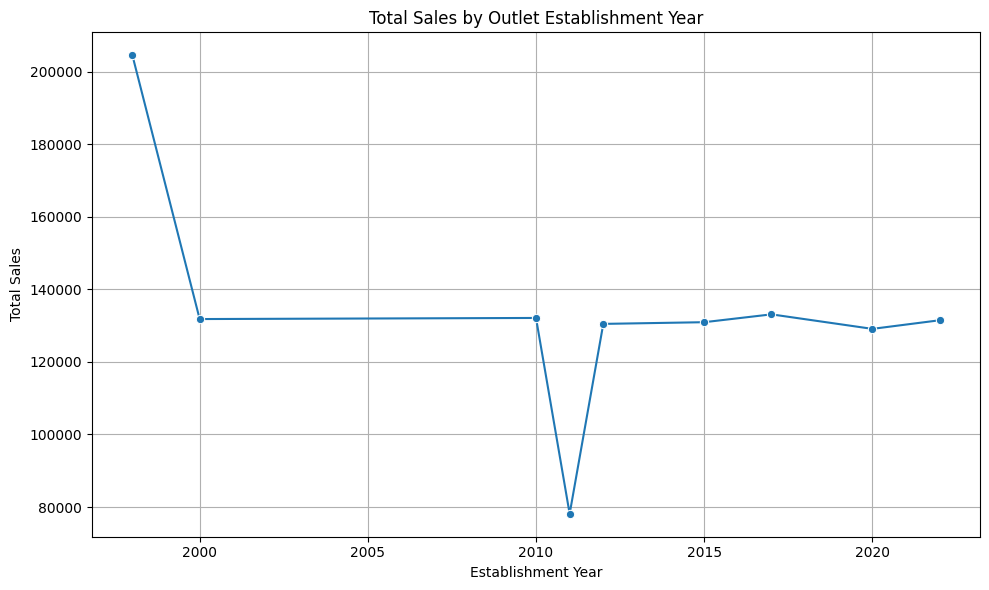

In [16]:
# Group by Outlet Establishment Year
yearly_sales = df.groupby('Outlet Establishment Year').agg(
    Total_Sales=('Sales', 'sum')
).reset_index().sort_values(by='Outlet Establishment Year')

# Plotting the Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='Outlet Establishment Year', y='Total_Sales', marker='o')
plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Establishment Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


Pie/Donut Chart: Sales by Outlet Size


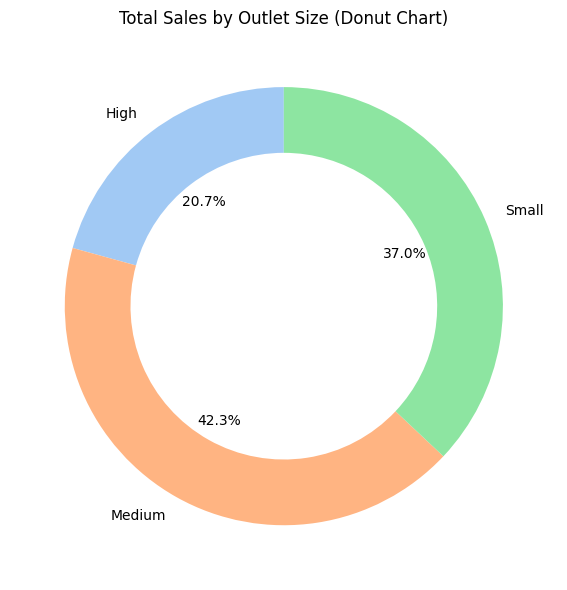

In [17]:
# Group by Outlet Size to calculate Total Sales
size_sales = df.groupby('Outlet Size').agg(
    Total_Sales=('Sales', 'sum')
).reset_index()

# Plotting the Donut Chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')[0:len(size_sales)]

plt.pie(size_sales['Total_Sales'], labels=size_sales['Outlet Size'],
        autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))
plt.title('Total Sales by Outlet Size (Donut Chart)')
plt.tight_layout()
plt.show()


Funnel Map: Sales by Outlet Location

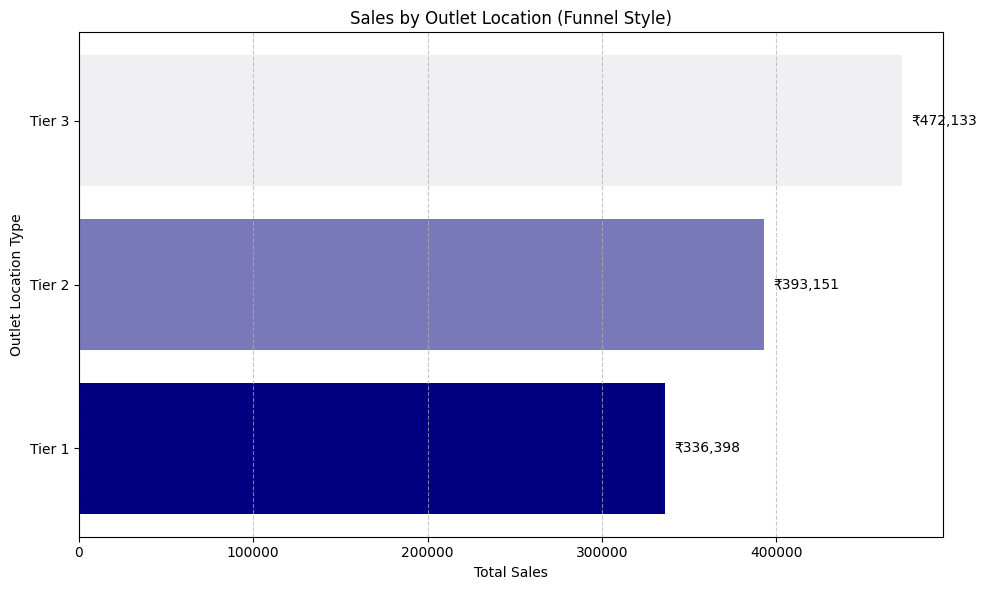

In [19]:
# Group sales by Outlet Location
location_sales = df.groupby('Outlet Location Type').agg(
    Total_Sales=('Sales', 'sum')
).reset_index()

# Sort descending for funnel effect
location_sales = location_sales.sort_values(by='Total_Sales', ascending=True)

# Create color gradient from light to dark for funnel effect
palette = sns.light_palette("navy", n_colors=len(location_sales), reverse=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(location_sales['Outlet Location Type'], location_sales['Total_Sales'], color=palette)

# Add sales values on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5000, bar.get_y() + bar.get_height()/2, f"₹{width:,.0f}", va='center')

plt.title('Sales by Outlet Location (Funnel Style)')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

